In [ ]:
# for my dataset I chose to put every book on my boookshelf into a csv table,
# in which I added to the books 1) the name of the author 2) the genre of the book 3) the language my version of the book is in
# 4) the number of pages it has 5) if it was translated and if Yes from which Language 6) Covertype
# 7) the gender of the author 8) the origin of the author 9) the age of the author at the time the book was first published
# 10) the occupation of the author 11) my personal rating 12) the publisher 13) the year it was first published in
 
# My questions were: 
# Do I own more books from female or from male writers?
# From which country are the most authors in my collections from?
# What is the average age from the authors in my collection?
# What is the average number of pages from the books in my collection?
# Do I rate the books of male or female authors higher?
# What is the average age of female author in my collection compared to the male author?
# Do the male or the female authors in my collection write more pages?

# Sadly my statistic is a little bit off because I currently have only 15 books in my posession, of which only 2 writers are female.
# But by expanding my book collection I can draw more precise conclusions


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
%matplotlib inline
plt.style.use('Solarize_Light2')


In [4]:
df = pd.read_csv(r"C:/Users/HOF01WIN10/Documents/Master Literaturwissenschaft/CVSTabelleBücher.csv", encoding = 'unicode_escape',sep=";", header =1)

In [5]:
df

,Title,Author,Genre,Language,Pages,Translation from,Covertype,Gender of A,Origin of A,Age of A. at the Time of 1st Pub.,Occup. of A,Rating,Publisher,Year of 1st Pub.
0,Little Women,Louisa May Alcott,Adulescent,English,217,No,Softcover,Female,USA,36,Author,8,Penguin Books,1868
1,Wie ein Dieb bei Tageslicht,Slavoj Zizek,Philosophy,German,286,English,Softcover,Male,Slowenia,69,Philosopher,7,S.Fischer,2018
2,Solaris,Stanislaw Lem,Science Fiction,German,237,Polish,Softcover,Male,Poland,47,Philosopher,5,Dtv,1968
3,Der totale Rausch,Norman Ohler,History,German,366,No,Softcover,Male,Germany,45,Author,7,Kiepenheuer & Wietsch,2015
4,Die Welle,Morton Rhue,Adulescent,German,186,English,Softcover,Male,USA,31,Author,7,Ravensburger Buchverlag,1981
5,F,Daniel Kehlmann,Fiction,German,380,German,Softcover,Male,Germany,39,Author,6,Rowohlt,2014
6,Die Geschichte der Bienen,Maja Lunde,Fiction,German,508,Norwegian,Softcover,Female,Norway,40,Author,6,Btb,2015
7,Zur Gesundung der österreichischen Seele,Erwin Ringel,Politics,German,288,No,Softcover,Male,Austria,65,Physician,5,Europaverlag,1986
8,Er ist wieder da,Timur Vermes,Fiction,German,396,No,Hardcover,Male,Germany,45,Journalist,8,Eichborn Verlag,2012
9,Anatomie der menschlichen Destruktivität,Erich Fromm,Psychology,German,570,English,Softcover,Male,Germany,73,Psychoanalyst,6,Rowohlt,1973


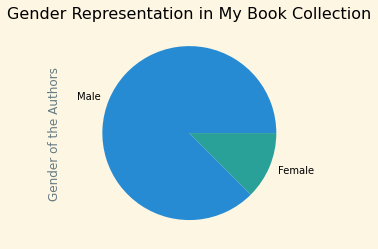

In [6]:
gender = df.iloc[:,7]
gender.value_counts().plot.pie()
plt.ylabel('Gender of the Authors',labelpad = 20)
plt.title("Gender Representation in My Book Collection")
plt.show()

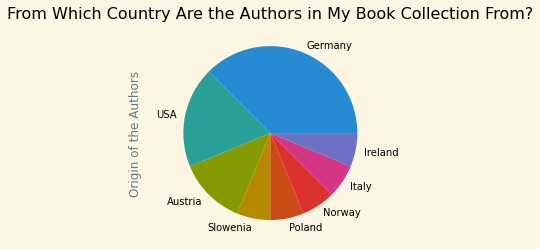

In [7]:
origin = df.iloc[:,8]
origin.value_counts().plot.pie()
plt.ylabel('Origin of the Authors',labelpad = 20)
plt.title("From Which Country Are the Authors in My Book Collection From?")
plt.show()

In [12]:
age = df.iloc[:,9]
print(age.median(axis = 0))
std = age.std();
print(std);
age.describe()

45.0
13.278899301774477


count    16.000000
mean     48.937500
std      13.278899
min      31.000000
25%      39.750000
50%      45.000000
75%      60.500000
max      73.000000
Name: Age of A. at the Time of 1st Pub., dtype: float64

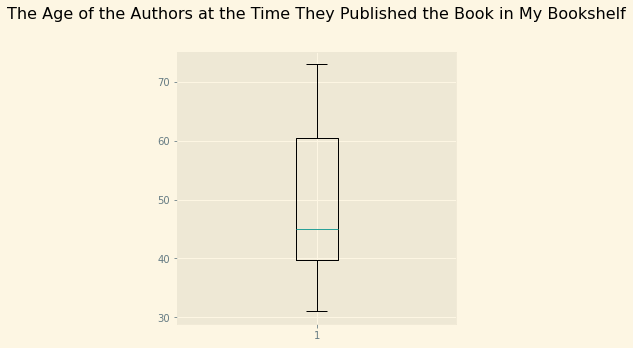

In [11]:
fig = plt.figure(figsize =(5,5))
plt.title("The Age of the Authors at the Time They Published the Book in My Bookshelf", y =1.1)
plt.boxplot(age)
plt.show()

In [13]:
pages = df.iloc[:,4]
pages.median(axis = 0)
print(pages.median(axis = 0))
std = pages.std();
print(std);
pages.describe()

287.0
126.23258955858691


count     16.00000
mean     315.00000
std      126.23259
min      108.00000
25%      232.75000
50%      287.00000
75%      384.00000
max      570.00000
Name: Pages , dtype: float64

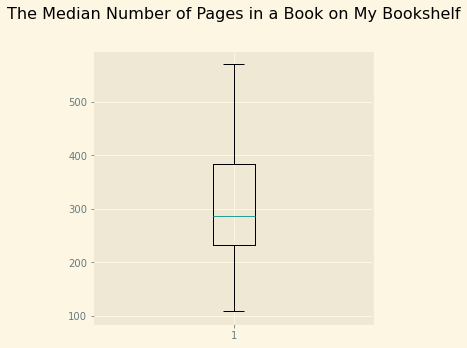

In [133]:
fig = plt.figure(figsize =(5,5))
plt.title("The Median Number of Pages in a Book on My Bookshelf", y = 1.1)
plt.boxplot(pages)
plt.show()

In [134]:
newdf = df.groupby('Gender of A').mean().round(1)
display(newdf)

,Pages,Age of A. at the Time of 1st Pub.,Rating,Year of 1st Pub.
Gender of A,,,,
Female,362.5,38.0,7.0,1941.5
Male,308.2,50.5,6.6,1995.4


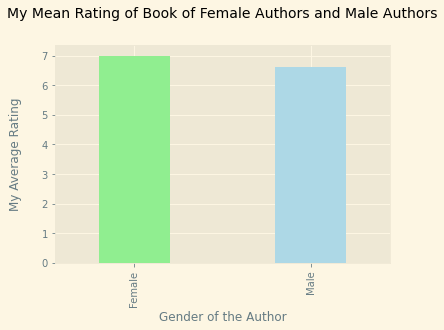

In [129]:
plt.title("My Mean Rating of Book of Female Authors and Male Authors", size = 14, y = 1.1,)
Rating = newdf.iloc[:,2]
Rating.plot(kind = "bar", color =['lightgreen','lightblue'], width = 0.4)
plt.xlabel("Gender of the Author")
plt.ylabel("My Average Rating", labelpad =20)
plt.show()


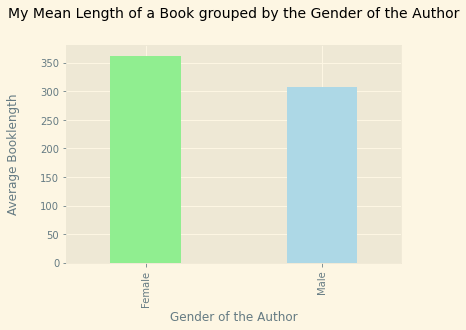

In [131]:
plt.title("My Mean Length of a Book Grouped by the Gender of the Author", size = 14, y = 1.1,)
Rating = newdf.iloc[:,0]
Rating.plot(kind = "bar", color =['lightgreen','lightblue'], width = 0.4)
plt.xlabel("Gender of the Author")
plt.ylabel("Average Booklength", labelpad =20)
plt.show()


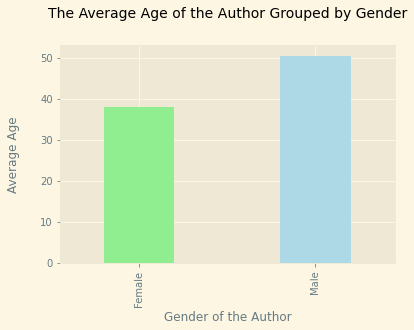

In [132]:
plt.title("The Average Age of the Author Grouped by Gender", size = 14, y = 1.1,)
Rating = newdf.iloc[:,1]
Rating.plot(kind = "bar", color =['lightgreen','lightblue'], width = 0.4)
plt.xlabel("Gender of the Author")
plt.ylabel("Average Age", labelpad =20)
plt.show()

In [ ]:
# Conclusions:
# I posess alot more books from male authors than from female authors
# Most of the books I posess are from German or American authors
# The median age of the authors in my collection is 45, 
# while the average age of male authors is about 50 and the average oge of female authors is just under 40 
# I do on average prefer female books over male books but this conclusion can easy change when I add more books to my collection
# On average my books from female authors are longer
# but: the conclusions based on gender are a little bit off because I only have two books from female authors,
# If I added more books this could easily change.